HAWE (24, 2)
24
CHAWE (24, 2)
24


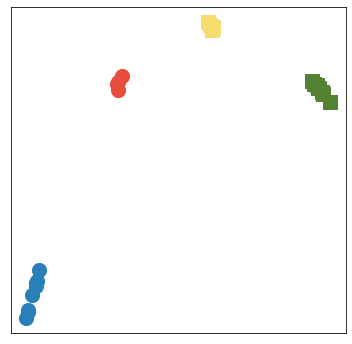

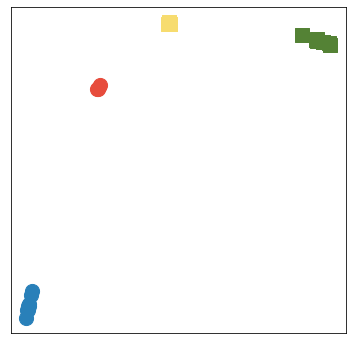

In [10]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import networkx as nx
import warnings
import numpy as np
import os
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import pandas as pd
from tqdm import tqdm

t = {'deepWalk':'DeepWalk', 'node2vec':'Node2vec','node2bits':'NODE2BITS','hin2vec':'HIN2vec','struc2vec':'struc2vec','metapath2vec':'metapath2vec','HAWE':'HAWE',
    'GraphSTONE':'GraphSTONE', 'RGCN':"RGCN",'AWE':'AWE','CHAWE':'CHAWE'}
markers = ['o', 's', 'H', 'D']
warnings.filterwarnings("ignore")

def vis(method, embed, types, label):
    color_pool = ['#2980B9', '#E74C3C', '#548235', '#F7DC6F', '#B9770E', '#8E44AD', '#797D7F', '#7B241C', '#EC7063', '#884EA0',
                     '#AF7AC5', '#5DADE2', '#1ABC9C', '#27AE60', '#F39C12', '#EDBB99', '#F5B7B1', '#FAD7A0']
    color_pool_rgb = [{'r': 41, 'g': 128, 'b': 185}, {'r': 231, 'g': 76, 'b': 60}, {'r': 72, 'g': 201, 'b': 176}, {'r': 247, 'g': 220, 'b': 111},
                  {'r': 185, 'g': 119, 'b': 14}, {'r': 142, 'g': 68, 'b': 173}, {'r': 121, 'g': 125, 'b': 127}, {'r': 123, 'g': 36, 'b': 28},
                  {'r': 236, 'g': 112, 'b': 99}, {'r': 136, 'g': 78, 'b': 160}, {'r': 175, 'g': 122, 'b': 197}, {'r': 93, 'g': 173, 'b': 226},
                  {'r': 26, 'g': 188, 'b': 156}, {'r': 39, 'g': 174, 'b': 96}, {'r': 243, 'g': 156, 'b': 18}, {'r': 237, 'g': 187, 'b': 153},
                  {'r': 245, 'g': 183, 'b': 177}, {'r': 250, 'g': 215, 'b': 160}]
    #tsne = TSNE()
    #emb = tsne.fit_transform(embed)
    #pca = PCA(n_components=2)
    #emb = pca.fit_transform(embed)
    emb = embed
    print(method, embed.shape)
    X = emb
    x_min, x_max = np.min(X, 0), np.max(X, 0)
    X = (X - x_min) / (x_max - x_min)
    plt.figure(figsize=(6, 6))           
    print(X.shape[0])
    for i in range(X.shape[0]):
        plt.scatter(X[i, 0], X[i, 1], color=color_pool[label[i] % len(color_pool)], s=200, marker=markers[ord(types[i])-ord('A')])
    #plt.title(t[method], fontsize=28,y=1.02)
    plt.xticks([]), plt.yticks([])
    fig = plt.gcf()
    fig.savefig('vis/2D_{}_{}.pdf'.format(dataset, method),bbox_inches='tight', pad_inches=0, format='pdf')
    

dataset = 'pinwheel'
label = np.loadtxt("dataset/{}/alllabels.txt".format(dataset), delimiter='\t', dtype=np.int)
#methods = ['hin2vec','struc2vec','deepWalk','GraphSTONE','RGCN', 'AWE', 'HAWE','CHAWE']
methods = ['HAWE','CHAWE']
for method in methods:
    
    embeddings = pd.read_csv("embedding/{}-{}.embeddings".format(method, dataset), skiprows=1, header=None, sep=' ')
    types = [eid[0] for eid in embeddings[0].values.tolist()]
    lbl = [label[int(eid[1:])][1] for eid in embeddings[0].values.tolist()]
    embeddings.reset_index(drop=True, inplace=True)
    embeddings.drop([embeddings.columns[0]], axis=1,inplace=True)
    embed = embeddings.values
    vis(method,embed, types, lbl)